### Importing Libs

In [10]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.visualization.visualize import categorical_eda, timeseries_eda, continuous_eda
sns.set(style = 'whitegrid')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Loading dataset

In [2]:
df_raw = pd.read_csv('../data/interim/attr_added/ectracking.csv')

E:\Gokul\Anaconda\envs\mldev\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df_raw.head()

,id,state,district,case_no,contraception_method,other,pregnancy_test_done,pregnancy_test_result,registration_no,rural_urban,visit_date,visit_no,isactive,previous_status,created_on
0,1,Haryana,Panchkula,1.000,NaN,NaN,Yes,Positive,106003464700.000,Rural,2019-04-02 00:00:00,1.000,NaN,EC,2019-04-04 14:28:27
1,2,Haryana,Panchkula,2.000,NaN,NaN,Yes,Positive,106000012873.000,Rural,2019-05-28 00:00:00,1.000,NaN,EC,2019-06-26 15:33:08
2,3,Haryana,Panchkula,2.000,NaN,NaN,Yes,Positive,106000012930.000,Rural,2019-04-16 00:00:00,1.000,NaN,EC,2019-06-26 11:18:21
3,4,Haryana,Panchkula,2.000,NaN,NaN,Yes,Positive,106000012956.000,Rural,2019-08-06 00:00:00,1.000,NaN,EC,2019-09-15 09:45:37
4,5,Haryana,Panchkula,1.000,NaN,NaN,Yes,Positive,106002357153.000,Rural,2017-04-11 00:00:00,1.000,NaN,EC,2017-05-27 12:34:16


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887279 entries, 0 to 887278
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     887279 non-null  object 
 1   state                  887278 non-null  object 
 2   district               887123 non-null  object 
 3   case_no                887278 non-null  float64
 4   contraception_method   194764 non-null  object 
 5   other                  1234 non-null    object 
 6   pregnancy_test_done    887278 non-null  object 
 7   pregnancy_test_result  629479 non-null  object 
 8   registration_no        887278 non-null  float64
 9   rural_urban            887278 non-null  object 
 10  visit_date             887278 non-null  object 
 11  visit_no               887278 non-null  float64
 12  isactive               162904 non-null  object 
 13  previous_status        887278 non-null  object 
 14  created_on             887278 non-nu

In [5]:
df_raw.iloc[:-1]

,id,state,district,case_no,contraception_method,other,pregnancy_test_done,pregnancy_test_result,registration_no,rural_urban,visit_date,visit_no,isactive,previous_status,created_on
0,1,Haryana,Panchkula,1.000,NaN,NaN,Yes,Positive,106003464700.000,Rural,2019-04-02 00:00:00,1.000,NaN,EC,2019-04-04 14:28:27
1,2,Haryana,Panchkula,2.000,NaN,NaN,Yes,Positive,106000012873.000,Rural,2019-05-28 00:00:00,1.000,NaN,EC,2019-06-26 15:33:08
2,3,Haryana,Panchkula,2.000,NaN,NaN,Yes,Positive,106000012930.000,Rural,2019-04-16 00:00:00,1.000,NaN,EC,2019-06-26 11:18:21
3,4,Haryana,Panchkula,2.000,NaN,NaN,Yes,Positive,106000012956.000,Rural,2019-08-06 00:00:00,1.000,NaN,EC,2019-09-15 09:45:37
4,5,Haryana,Panchkula,1.000,NaN,NaN,Yes,Positive,106002357153.000,Rural,2017-04-11 00:00:00,1.000,NaN,EC,2017-05-27 12:34:16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887273,887274,Haryana,Sirsa,1.000,OC PILLS,NaN,No,NaN,106003403198.000,Rural,2019-09-21 00:00:00,6.000,NaN,EC,2019-12-10 19:02:52
887274,887275,Haryana,Sirsa,1.000,OC PILLS,NaN,No,NaN,106003403198.000,Rural,2019-10-19 00:00:00,7.000,NaN,EC,2019-12-10 19:02:53
887275,887276,Haryana,Kaithal,1.000,NaN,NaN,Yes,Positive,106004520370.000,Rural,2020-01-16 05:30:00,1.000,t,EC,2020-01-16 05:30:00
887276,887277,Haryana,Gurgaon,1.000,NaN,NaN,Yes,Positive,106004520375.000,Rural,2020-04-26 05:30:00,1.000,t,EC,2020-04-26 05:30:00


In [6]:
df = df_raw.iloc[:-1].copy()

### Univariate EDA

In [9]:
for col in df:
	print(col, df[col].nunique())

id 887278
state 1
district 12
case_no 5
contraception_method 8
other 254
pregnancy_test_done 3
pregnancy_test_result 3
registration_no 721662
rural_urban 1
visit_date 2698
visit_no 48
isactive 1
previous_status 1
created_on 573073


In [11]:
categorical_cols = [] 
continuous_cols = [] 
datetime_cols = [] 
other_cols = [] 

In [12]:
for col in df:
	if df[col].nunique() <= 15:
		categorical_cols.append(col)
	else:
		continuous_cols.append(col)

In [13]:
categorical_cols

['state',
 'district',
 'case_no',
 'contraception_method',
 'pregnancy_test_done',
 'pregnancy_test_result',
 'rural_urban',
 'isactive',
 'previous_status']

In [14]:
continuous_cols

['id', 'other', 'registration_no', 'visit_date', 'visit_no', 'created_on']

In [15]:
df['other'].unique()

array([nan, 'Natural method', 'PPIUCD', 'Menopause', 'injection Antra',
       'antra', 'Antra', 'chhaya', 'menopause', 'antral', 'no',
       'dimpa injection', 'dimpa', 'dipma', 'ANC', 'condom', 'santosh',
       'MALA N', 'MALA A AN', 'COPAR T', 'CHAYA GOLI', 'INJACTION DIMPA',
       'f', 'Widower', 'Mala Arv', 'CT', 'ANTRAINGECION', 'Histacto my',
       'ppiucd', 'ppuicd', 'Ppuicd', 'Dmpa', 'op', 'ppiucf', 'ppicud',
       'none', 'injection antra', 'shaya', 'Ppiucd', 'DMPA', 'copper t',
       'inj Antra', 'minopuse', 'Maltiload', 'Qntra', 'injection antwrs',
       'INj  antra', 'IMG antra', 'INj  Antra', 'INJECTION', 'nil',
       'hysterectomy', 'Antra injection', 'Menopouse', 'injuction',
       'tube acti me', 'pregnant', 'mala d', 'No', 'OTHER', 'ants',
       'inj dimpa first dose', 'antra injection', 'Uteres remove', 'Asha',
       'Manju', 'Widhrol', 'other', 'Other', 'weekly pills', 'lnj antra',
       'pp iucd', 'condoms', 'dont know', 'privet', 'Antara injection',
  

In [16]:
timeseries_cols = ['visit_date', 'created_on']
other_cols = ['id', 'other', 'registration_no']
continuous_cols = list(set(continuous_cols) - set(timeseries_cols) - set(other_cols))

### Categorical features

******************** state ********************
Unique values: ['Haryana']
No. of unique values: 1
Missing values count: 0 / 887278
Missing values %: 0.0
Value counts: 
Haryana   100.000
Name: state, dtype: float64


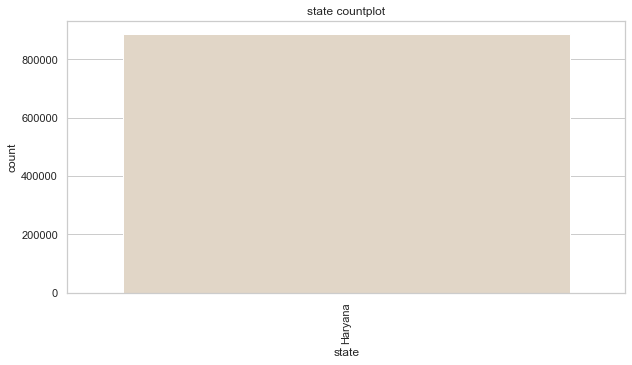

******************** district ********************
Unique values: ['Panchkula' 'Mewat' 'Palwal' 'Yamunanagar' 'Ambala' 'Mahendragarh' nan
 'Hisar' 'Karnal' 'Jind' 'Kaithal' 'Sirsa' 'Gurgaon']
No. of unique values: 12
Missing values count: 155 / 887278
Missing values %: 0.00017469158482459837
Value counts: 
Sirsa          17.394
Hisar          11.801
Karnal         11.201
Jind            9.480
Kaithal         8.847
Gurgaon         8.239
Yamunanagar     7.468
Ambala          7.065
Palwal          6.106
Mewat           4.840
Mahendragarh    4.063
Panchkula       3.496
Name: district, dtype: float64


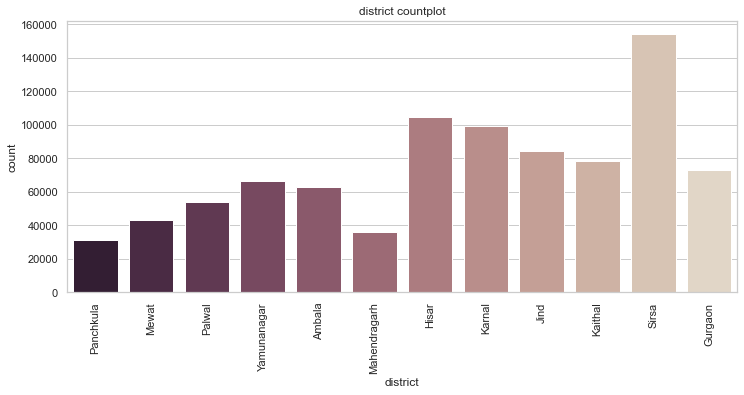

******************** case_no ********************
Unique values: [1. 2. 3. 4. 5.]
No. of unique values: 5
Missing values count: 0 / 887278
Missing values %: 0.0
Value counts: 
1.000   88.926
2.000   10.524
3.000    0.517
4.000    0.031
5.000    0.001
Name: case_no, dtype: float64


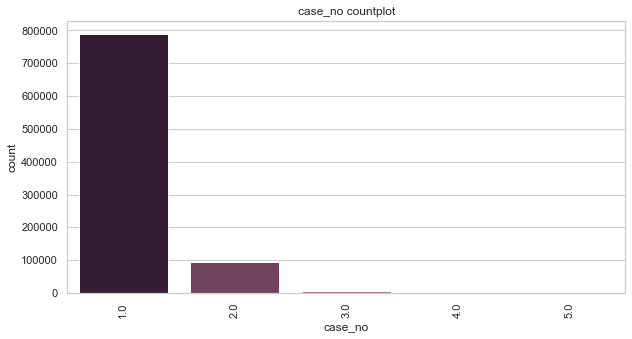

******************** contraception_method ********************
Unique values: [nan 'CONDOM' 'OC PILLS' 'IUCD CU 380A(10 YRS)' 'EC PILLS'
 'FEMALE STERILIZATION' 'IUCD CU 375(5 YRS)' 'MALE STERILIZATION'
 'ANY OTHER SPECIFY']
No. of unique values: 8
Missing values count: 692514 / 887278
Missing values %: 0.7804926978917544
Value counts: 
CONDOM                 67.250
IUCD CU 380A(10 YRS)    9.980
OC PILLS                9.445
FEMALE STERILIZATION    7.917
IUCD CU 375(5 YRS)      3.382
EC PILLS                0.842
ANY OTHER SPECIFY       0.651
MALE STERILIZATION      0.534
Name: contraception_method, dtype: float64


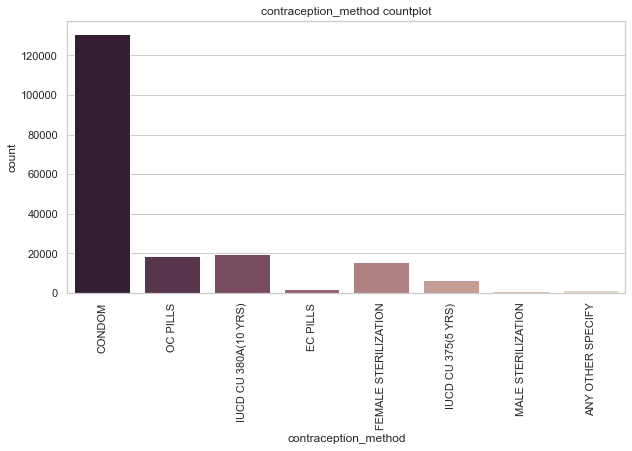

******************** pregnancy_test_done ********************
Unique values: ['Yes' 'No' 'Declined']
No. of unique values: 3
Missing values count: 0 / 887278
Missing values %: 0.0
Value counts: 
Yes        70.685
No         29.057
Declined    0.259
Name: pregnancy_test_done, dtype: float64


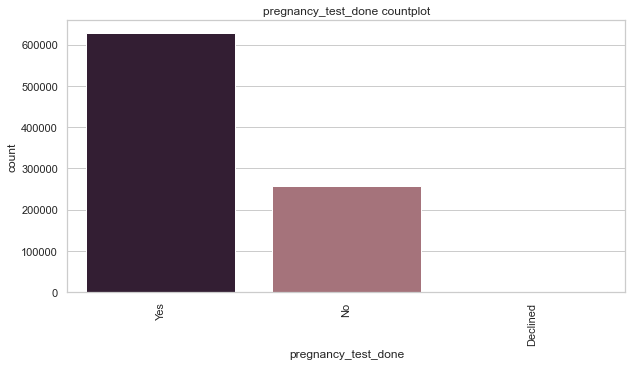

******************** pregnancy_test_result ********************
Unique values: ['Positive' nan 'Declined' 'Negative']
No. of unique values: 3
Missing values count: 257799 / 887278
Missing values %: 0.2905504250077202
Value counts: 
Positive   96.425
Declined    3.402
Negative    0.173
Name: pregnancy_test_result, dtype: float64


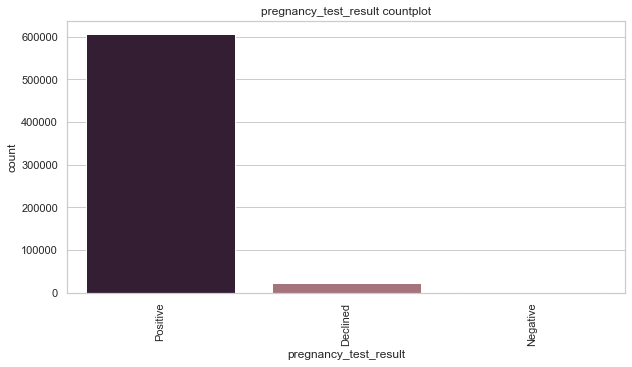

******************** rural_urban ********************
Unique values: ['Rural']
No. of unique values: 1
Missing values count: 0 / 887278
Missing values %: 0.0
Value counts: 
Rural   100.000
Name: rural_urban, dtype: float64


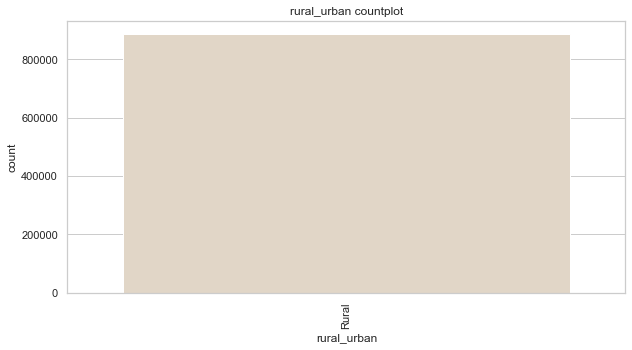

******************** isactive ********************
Unique values: [nan 't']
No. of unique values: 1
Missing values count: 724374 / 887278
Missing values %: 0.8164002713918298
Value counts: 
t   100.000
Name: isactive, dtype: float64


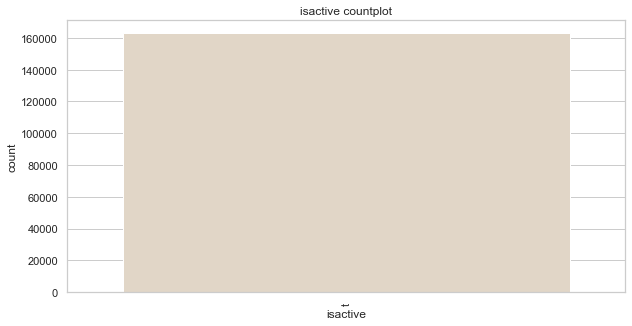

******************** previous_status ********************
Unique values: ['EC']
No. of unique values: 1
Missing values count: 0 / 887278
Missing values %: 0.0
Value counts: 
EC   100.000
Name: previous_status, dtype: float64


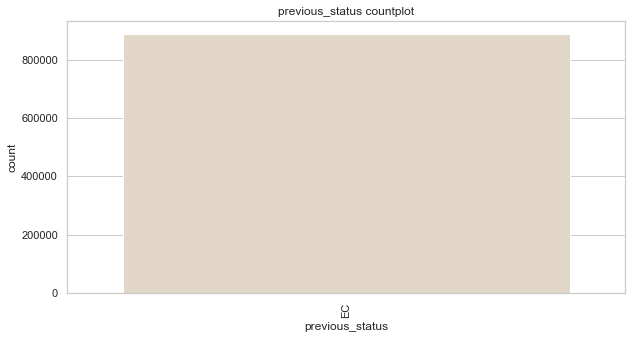

In [18]:
for col in categorical_cols:
	print('*'*20, col, '*'*20)
	if df[col].nunique() <= 10:
		categorical_eda(df, col, (10, 5))
	else:
		categorical_eda(df, col, (df[col].nunique(), 5))

In [20]:
df[df['pregnancy_test_done'] == 'Declined']['pregnancy_test_result'].unique()

array(['Positive', 'Declined', 'Negative'], dtype=object)